In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bisun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import re, string

In [3]:
df= pd.read_csv('data_for_project.csv', encoding = 'ISO-8859-1')

In [4]:
df.sample(5)

,Text,Score
4392,Nepal bhrii ghumdai raich bihaan dekhi,1.0
3376,surkssaa aaphnai hunch,1.0
2618,Timro karyanvayan ma samajik sahbhagita badhchha,1.0
228,tmle afai garyau vane ramro ho,1.0
111,mero bike bigri sakyo.,0.0


In [5]:
df

,Text,Score
0,sanchai ho timi ?,1.0
1,tmro k xa khabr?,1.0
2,naya naulo sunau ?,1.0
3,mero ni thikai xa.,1.0
4,zindagi ramailo nai xa .,1.0
...,...,...
4953,bncro haancn,1.0
4954,khuttttaa maa bncro,0.0
4955,dherai harami manxe ho,0.0
4956,harami kaa garera basxa yo,0.0


In [6]:
df.duplicated().sum()

563

In [7]:
df.isnull().sum()

Text     0
Score    3
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df

,Text,Score
0,sanchai ho timi ?,1.0
1,tmro k xa khabr?,1.0
2,naya naulo sunau ?,1.0
3,mero ni thikai xa.,1.0
4,zindagi ramailo nai xa .,1.0
...,...,...
4953,bncro haancn,1.0
4954,khuttttaa maa bncro,0.0
4955,dherai harami manxe ho,0.0
4956,harami kaa garera basxa yo,0.0


In [11]:
df['Score'].value_counts()

1.0    2721
0.0    1671
Name: Score, dtype: int64

In [12]:
df

,Text,Score
0,sanchai ho timi ?,1.0
1,tmro k xa khabr?,1.0
2,naya naulo sunau ?,1.0
3,mero ni thikai xa.,1.0
4,zindagi ramailo nai xa .,1.0
...,...,...
4953,bncro haancn,1.0
4954,khuttttaa maa bncro,0.0
4955,dherai harami manxe ho,0.0
4956,harami kaa garera basxa yo,0.0


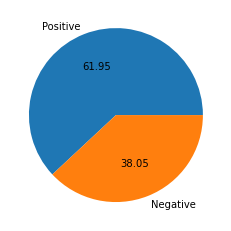

In [13]:
plt.pie(df['Score'].value_counts(), labels=['Positive', 'Negative'], autopct='%0.2f')
plt.show()

In [14]:
#df['num_characters'] = df['Text'].apply(len)
#df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
#df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
#plt.figure(figsize = (12,6))
#sns.histplot(df[df['Score']==0]['num_characters'] , color='red')
#sns.histplot(df[df['Score']==1]['num_characters'] ,color='green')

In [16]:
#plt.figure(figsize = (12,6))
#sns.histplot(df[df['Score']==0]['num_words'] , color='red')
#sns.histplot(df[df['Score']==1]['num_words'] ,color='green')

In [17]:
#df = df.drop(['num_words','num_sentences','num_characters'] ,axis=1)

In [18]:
df

,Text,Score
0,sanchai ho timi ?,1.0
1,tmro k xa khabr?,1.0
2,naya naulo sunau ?,1.0
3,mero ni thikai xa.,1.0
4,zindagi ramailo nai xa .,1.0
...,...,...
4953,bncro haancn,1.0
4954,khuttttaa maa bncro,0.0
4955,dherai harami manxe ho,0.0
4956,harami kaa garera basxa yo,0.0


In [19]:
custom_stopwords = ['ek','hai','tyo','nai','k', 'ko', 'ma', 'la','lai', 'le', 'ka', 'ko', 'ho','ehh','hmm','ha','hajur','ta','haha' , 'vayo','timi','tapai','uni','usko','usle','unle','ake','yrr','oh' ,'ohh', 'hun', 'ta', 'ra','po','pani','yesle','ni','hamro','tw','tmle','tmlai','tmele','yo','chhan','xa','pni','chha','timro','timi','maile','ma' ,'honi','hota']

In [20]:
common_suffixes = ['haru', 'ko','lai','ko','hos','sake','paxi','kheri','ma','hunxa','xu']

In [21]:
#%%writefile preprocessing.py
custom_stopwords = ['ek','hai','tyo','nai','k', 'ko', 'ma', 'la','lai', 'le', 'ka', 'ko', 'ho','ehh','hmm','ha','hajur','ta','haha' , 'vayo','timi','tapai','uni','usko','usle','unle','ake','yrr','oh' ,'ohh', 'hun', 'ta', 'ra','po','pani','yesle','ni','hamro','tw','tmle','tmlai','tmele','yo','chhan','xa','pni','chha','timro','timi','maile','ma' ,'honi','hota']

def clean_sent(sent):
    #if isinstance(sent, str):
        # If a single text input is provided, convert it to a list
        #sent = [sent]
    words = nltk.word_tokenize(sent)
    
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    words = [re_punc.sub('' ,word) for word in words]
    
    re_printable = re.compile('[^%s]' %re.escape(string.printable))
    words = [re_printable.sub('',word)for word in words]
    
    words = [word for word in words if word.isalpha()]
    
    words = [word for word in words if len(word)>1]
    
    words = [word.lower() for word in words]
    
    words = [word for word in words if word not in custom_stopwords]
    words = [word[:-4] + 'xa' if word.endswith('chha') else word for word in words]
    words = [word[:-5] + 'xan' if word.endswith('chhan') else word for word in words]
    words = [word[:-5] + 'xau' if word.endswith('chhau') else word for word in words]
    words = [word[:-2] + 'xa' if word.endswith('ch') else word for word in words]
    words = [word[:-5] + 'xaina' if word.endswith('chain') else word for word in words]
    words = [word[:-7] + 'xaina' if word.endswith('chhaina') else word for word in words]
    words = [word[:-6] + 'xaina' if word.endswith('chaina') else word for word in words]
    

 
    
    #words = [wn.lemmatize(word ,pos='v') for word in words]
    
    words = [word[:-4] if (word.endswith('haru') and len(word) > 4) else word for word in words]
    words = [word[:-2] if (word.endswith('ko') and len(word) > 2) else word for word in words]
    words = [word[:-3] if (word.endswith('lai') and len(word) >3) else word for word in words]
    words = [word[:-2] if word.endswith('ko') and len (word)> 2 else word for word in words]
    words = [word[:-4] if word.endswith('hos') and len (word)> 3 else word for word in words]
    words = [word[:-4] if word.endswith('sake')and len (word)> 4 else word for word in words]
    words = [word[:-4] if word.endswith('paxi')and len (word)> 4 else word for word in words]
    words = [word[:-5] if word.endswith('kheri') and len (word)> 5 else word for word in words]
    words = [word[:-2] if word.endswith('ma') and len (word)> 2 else word for word in words]
    words = [word[:-5] if word.endswith('hunxa') and len (word)> 5 else word for word in words]
    words = [word[:-5] if word.endswith('hunxu')and len (word)> 5 else word for word in words]
    words = [word[:-2] if word.endswith('xu')and len (word)> 2 else word for word in words]
    words = [word[:-2] if word.endswith('xa')and len (word)> 2 else word for word in words]
    words = [word[:-4] if word.endswith('vayo')and len (word)> 4 else word for word in words]
    words = [word[:-2] if word.endswith('le')and len (word)> 2 else word for word in words]
    #words =[word[:-len(suffix)] if (word.endswith(suffix) and len(word) > len(suffix)) else word for word in words for suffix in common_suffixes]
    
    words = set(words)
    
    return  " ".join(words)

In [75]:
clean_sent('yaha manxeharu paxi fataha vayakachhan')

'manxe yaha fataha vayakaxan paxi'

In [23]:
df['Text'] = df['Text'].apply(clean_sent)

C:\Users\bisun\AppData\Local\Temp/ipykernel_13064/2063979165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(clean_sent)


In [24]:
df

,Text,Score
0,sanchai,1.0
1,khabr tmro,1.0
2,naulo naya sunau,1.0
3,thikai mero,1.0
4,ramailo zindagi,1.0
...,...,...
4953,bncro haancn,1.0
4954,maa bncro khuttttaa,0.0
4955,dherai manxe harami,0.0
4956,kaa harami garera bas,0.0


In [25]:
df.duplicated().sum()

35

In [26]:
df = df.drop_duplicates(keep='first')

In [27]:
df

,Text,Score
0,sanchai,1.0
1,khabr tmro,1.0
2,naulo naya sunau,1.0
3,thikai mero,1.0
4,ramailo zindagi,1.0
...,...,...
4953,bncro haancn,1.0
4954,maa bncro khuttttaa,0.0
4955,dherai manxe harami,0.0
4956,kaa harami garera bas,0.0


In [28]:
from wordcloud import WordCloud
wc =WordCloud(width=1000 ,height=1000, min_font_size=10, background_color='white')

In [29]:
pos_wc = wc.generate(df[df['Score'] == 1]['Text'].str.cat(sep=" "))

In [30]:
pos_wc

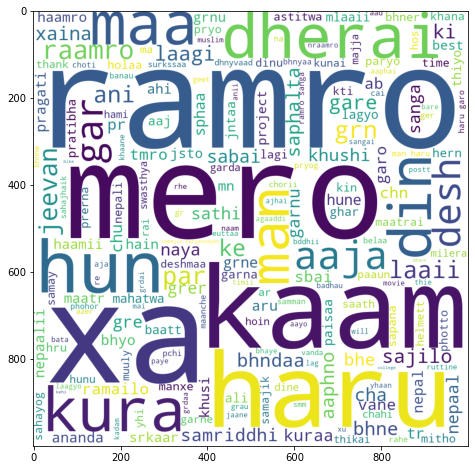

In [31]:
plt.figure(figsize=(10,8))
plt.imshow(pos_wc)

In [32]:
neg_wc = wc.generate(df[df['Score'] == 0]['Text'].str.cat(sep=" "))

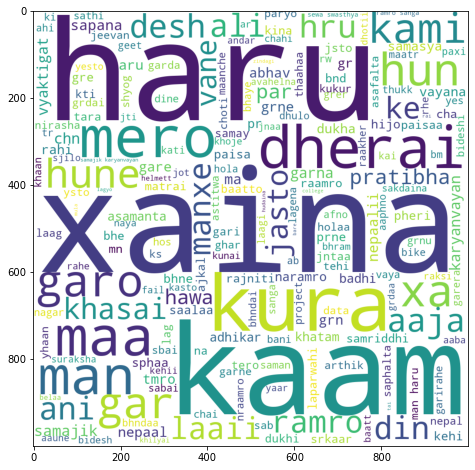

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(neg_wc)

In [34]:
pos_corpus = []
for msg in df[df['Score'] ==1]['Text'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [35]:
neg_corpus = []
for msg in df[df['Score'] ==0]['Text'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

In [36]:
pos_corpus

['sanchai',
 'khabr',
 'tmro',
 'naulo',
 'naya',
 'sunau',
 'thikai',
 'mero',
 'ramailo',
 'zindagi',
 'xan',
 'sabai',
 'tmro',
 'sanchai',
 'ghar',
 'thikai',
 'vane',
 'nasta',
 'jam',
 'na',
 'khana',
 'sodhana',
 'sikaihal',
 'naaya',
 'use',
 'mero',
 'ahi',
 'saman',
 'garana',
 'garne',
 'bela',
 'tmro',
 'exercise',
 'hola',
 'tmro',
 'time',
 'jane',
 'gym',
 'khana',
 'pakaisakyau',
 'help',
 'garna',
 'aam',
 'haldi',
 'hijo',
 'project',
 'update',
 'sike',
 'hijo',
 'hisab',
 'book',
 'haru',
 'ramro',
 'kura',
 'padhnu',
 'respect',
 'par',
 'sir',
 'garnu',
 'naya',
 'laptop',
 'kine',
 'hijo',
 'matrai',
 'dinu',
 'kehi',
 'hint',
 'na',
 'sikna',
 'bare',
 'yes',
 'garana',
 'gardi',
 'tyata',
 'check',
 'lag',
 'garna',
 'ma',
 'naya',
 'ramro',
 'kura',
 'explore',
 'badhi',
 'chaso',
 'rakh',
 'ghumna',
 'kura',
 'jane',
 'ghumne',
 'thau',
 'dherai',
 'aauna',
 'yetai',
 'tira',
 'sikau',
 'question',
 'sathi',
 'na',
 'khasai',
 'nagara',
 'mero',
 'chinta',
 '

In [37]:
type(pos_corpus)

list

In [38]:
neg_corpus

['kaam',
 'khatam',
 'garayu',
 'lastai',
 'kaam',
 'hawa',
 'gar',
 'aayara',
 'garyau',
 'ahi',
 'hawa',
 'kura',
 'nagara',
 'yesto',
 'tme',
 'kura',
 'jot',
 'manxe',
 'rai',
 'hawa',
 'bike',
 'sakyo',
 'bigri',
 'mero',
 'hijo',
 'birse',
 'ma',
 'suna',
 'garna',
 'xas',
 'kina',
 'tai',
 'man',
 'hawa',
 'mula',
 'kura',
 'lagyo',
 'garxas',
 'tehi',
 'bare',
 'mero',
 'ramro',
 'sanga',
 'janirakh',
 'tai',
 'mero',
 'khane',
 'bani',
 'jad',
 'raksi',
 'khasai',
 'mero',
 'bani',
 'padhne',
 'xaina',
 'ma',
 'dekhi',
 'wakka',
 'zindagi',
 'lagna',
 'thalyo',
 'bike',
 'hijo',
 'pheri',
 'bigryo',
 'khasai',
 'kaam',
 'xaina',
 'kehi',
 'jhagada',
 'bato',
 'paryo',
 'yettikai',
 'hijo',
 'mero',
 'thau',
 'thik',
 'chaldaina',
 'ali',
 'dimag',
 'khasai',
 'manxe',
 'hudaina',
 'haru',
 'sanga',
 'ghulmil',
 'aru',
 'psycho',
 'jasto',
 'ali',
 'nagar',
 'tes',
 'chinta',
 'thik',
 'parihal',
 'bal',
 'dinna',
 'tero',
 'kura',
 'sa',
 'garna',
 'bas',
 'aaukat',
 'sak',
 '

In [39]:
corpus1 = set(pos_corpus)
corpus2= set(neg_corpus)

In [40]:
common = corpus1.intersection(corpus2)

In [41]:
common

{'garyau',
 'yhi',
 'kura',
 'film',
 'krbaatt',
 'belaa',
 'sudhar',
 'khilyai',
 'puge',
 'khaaneho',
 'euttai',
 'joke',
 'hain',
 'react',
 'gideu',
 'tthulaa',
 'bideshi',
 'bhye',
 'chiso',
 'khbr',
 'philekaa',
 'khasi',
 'nyaay',
 'hraai',
 'grdaa',
 'piddaa',
 'gar',
 'grn',
 'abhivyakti',
 'ghmndd',
 'us',
 'katha',
 'laagi',
 'prlaa',
 'halka',
 'pkrie',
 'tgaaro',
 'lier',
 'daai',
 'ek',
 'banau',
 'and',
 'tr',
 'taste',
 'bacha',
 'laaii',
 'kaangres',
 'intern',
 'gareu',
 'sng',
 'rish',
 'aaja',
 'phel',
 'tirne',
 'dinbhri',
 'garxau',
 'kmaaunisstt',
 'prdhaanmntrii',
 'phesbuukmaa',
 'sathi',
 'haina',
 'kulcer',
 'tesro',
 'din',
 'grnii',
 'lyrics',
 'jiban',
 'sabi',
 'dimaakh',
 'hrkt',
 'bachelor',
 'jbsmm',
 'uslaaii',
 'gau',
 'harmo',
 'support',
 'tirer',
 'swag',
 'sambhavana',
 'baaelekaae',
 'garna',
 'broomer',
 'saphalta',
 'ghar',
 'cleaner',
 'bisvs',
 'raamro',
 'pic',
 'tiirth',
 'nhune',
 'kinn',
 'laager',
 'bholi',
 'laptop',
 'gltii',
 'khusi'

In [42]:
len(common)

1483

In [43]:
len(pos_corpus)

13551

In [44]:
len(neg_corpus)

7992

In [45]:
 len(corpus1)

4214

In [46]:
len(corpus2)

3019

In [47]:
from collections import Counter
pos_df = pd.DataFrame(Counter(pos_corpus).most_common(20))
neg_df = pd.DataFrame(Counter(neg_corpus).most_common(20))

In [48]:
pos_df

,0,1
0,ramro,148
1,haru,132
2,xa,120
3,mero,98
4,kaam,97
5,hun,93
6,maa,76
7,dherai,72
8,kura,70
9,man,69


In [49]:
neg_df

,0,1
0,haru,98
1,xaina,97
2,kaam,71
3,kura,50
4,man,46
5,dherai,43
6,mero,42
7,maa,38
8,ramro,37
9,hun,36


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.iloc[:,:1]

In [52]:
X

,Text
0,sanchai
1,khabr tmro
2,naulo naya sunau
3,thikai mero
4,ramailo zindagi
...,...
4953,bncro haancn
4954,maa bncro khuttttaa
4955,dherai manxe harami
4956,kaa harami garera bas


In [53]:
y= df.iloc[:,-1]

In [54]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4953    1.0
4954    0.0
4955    0.0
4956    0.0
4957    0.0
Name: Score, Length: 4357, dtype: float64

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# TFIDF

In [111]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
tfidf = TfidfVectorizer()


In [112]:
X_train_tfidf = tfidf.fit_transform(X_train['Text']).toarray()
X_test_tfidf = tfidf.transform(X_test['Text']).toarray()

In [113]:
X_train_tfidf.shape

(3485, 5255)

In [114]:
X_test_tfidf.shape

(872, 5255)

In [81]:
tfidf.vocabulary_

{'ngrdaa': 3239,
 'aphelnaa': 270,
 'hun': 2061,
 'biplb': 778,
 'kaarnn': 2340,
 'hune': 2070,
 'jnm': 2251,
 'yestai': 5201,
 'hru': 2038,
 'chinta': 1051,
 'anivaary': 233,
 'aaik': 36,
 'helmett': 1935,
 'bsnelaaii': 909,
 'pchaaddi': 3527,
 'gridain': 1755,
 'sewa': 4289,
 'vridhhi': 5122,
 'swasthya': 4638,
 'lyaipuraayo': 2863,
 'nikai': 3261,
 'pr': 3655,
 'bhndaa': 649,
 'timii': 4782,
 'sagar': 4100,
 'ananda': 210,
 'man': 2929,
 'dub': 1389,
 'asantushti': 308,
 'prabhavit': 3665,
 'vyaktitwa': 5127,
 'bahir': 429,
 'andar': 218,
 'garos': 1595,
 'jatti': 2172,
 'kasto': 2387,
 'nava': 3186,
 'yotw': 5223,
 'hainw': 1875,
 'gardapani': 1554,
 'my': 3119,
 'respect': 3958,
 'you': 5224,
 'have': 1921,
 'chaadder': 993,
 'curott': 1156,
 'khaau': 2446,
 'kettii': 2425,
 'kettaa': 2422,
 'top': 4820,
 'tesai': 4687,
 'mridain': 3071,
 'maarin': 2890,
 'ki': 2556,
 'dherai': 1294,
 'manpari': 2945,
 'sab': 4082,
 'saubhagya': 4251,
 'sampannata': 4201,
 'anubhoga': 246,
 'gar':

# N-grams


In [118]:
cv = CountVectorizer(binary=True)

In [119]:
X_train_bow = cv.fit_transform(X_train['Text']).toarray()
X_test_bow = cv.transform(X_test['Text']).toarray()

In [120]:
X_train_bow.shape

(3485, 5255)

In [121]:
print(cv.vocabulary_)

{'ngrdaa': 3239, 'aphelnaa': 270, 'hun': 2061, 'biplb': 778, 'kaarnn': 2340, 'hune': 2070, 'jnm': 2251, 'yestai': 5201, 'hru': 2038, 'chinta': 1051, 'anivaary': 233, 'aaik': 36, 'helmett': 1935, 'bsnelaaii': 909, 'pchaaddi': 3527, 'gridain': 1755, 'sewa': 4289, 'vridhhi': 5122, 'swasthya': 4638, 'lyaipuraayo': 2863, 'nikai': 3261, 'pr': 3655, 'bhndaa': 649, 'timii': 4782, 'sagar': 4100, 'ananda': 210, 'man': 2929, 'dub': 1389, 'asantushti': 308, 'prabhavit': 3665, 'vyaktitwa': 5127, 'bahir': 429, 'andar': 218, 'garos': 1595, 'jatti': 2172, 'kasto': 2387, 'nava': 3186, 'yotw': 5223, 'hainw': 1875, 'gardapani': 1554, 'my': 3119, 'respect': 3958, 'you': 5224, 'have': 1921, 'chaadder': 993, 'curott': 1156, 'khaau': 2446, 'kettii': 2425, 'kettaa': 2422, 'top': 4820, 'tesai': 4687, 'mridain': 3071, 'maarin': 2890, 'ki': 2556, 'dherai': 1294, 'manpari': 2945, 'sab': 4082, 'saubhagya': 4251, 'sampannata': 4201, 'anubhoga': 246, 'gar': 1538, 'vyaktigat': 5126, 'saphalta': 4231, 'karyanvayan': 2

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
from sklearn.svm import SVC

In [89]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()
svc1 = SVC(kernel='sigmoid', gamma=1.0)
svc2 = SVC(kernel='sigmoid', gamma=1.0)

# TFIDF

In [128]:
gnb1.fit(X_train_tfidf,y_train)
y_pred1 = gnb1.predict(X_test_tfidf)
print("Accuracy_Score : ",round(accuracy_score(y_test,y_pred1),3))
print("confusion Matrix :  ", confusion_matrix(y_test,y_pred1))
print("Precision Score : ",round(precision_score(y_test,y_pred1),3))

Accuracy_Score :  0.698
confusion Matrix :   [[264  61]
 [202 345]]
Precision Score :  0.85


In [116]:
mnb1.fit(X_train_tfidf,y_train)
y_pred2 = mnb1.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7660550458715596
[[160 165]
 [ 39 508]]
0.7548291233283804


In [117]:
bnb1.fit(X_train_tfidf,y_train)
y_pred3 = bnb1.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7488532110091743
[[153 172]
 [ 47 500]]
0.7440476190476191


In [70]:
svc1.fit(X_train_tfidf,y_train)
y_pred4 = svc1.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.7557339449541285
[[174 151]
 [ 62 485]]
0.7625786163522013


# BOW


In [93]:
gnb2.fit(X_train_bow,y_train)
y_pred1 = gnb2.predict(X_test_bow)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7052752293577982
[[270  55]
 [202 345]]
0.8625


In [94]:
mnb2.fit(X_train_bow,y_train)
y_pred2 = mnb2.predict(X_test_bow)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7763761467889908
[[203 122]
 [ 73 474]]
0.7953020134228188


In [95]:
bnb2.fit(X_train_bow,y_train)
y_pred3 = bnb2.predict(X_test_bow)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7488532110091743
[[153 172]
 [ 47 500]]
0.7440476190476191


In [96]:
svc2.fit(X_train_bow,y_train)
y_pred4 = svc2.predict(X_test_bow)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.6811926605504587
[[152 173]
 [105 442]]
0.71869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(cv,open('bow_vectorizer.pkl','wb'))
pickle.dump(mnb2,open('mnb2_model.pkl','wb'))
pickle.dump(gnb2,open('gnb2_model.pkl','wb'))
pickle.dump(bnb2,open('bnb2_model.pkl','wb'))
pickle.dump(svc2,open('svc2_model.pkl','wb'))

In [ ]:
pickle.dump(mnb1,open('mnb_model.pkl','wb'))
pickle.dump(gnb1,open('gnb_model.pkl','wb'))
pickle.dump(bnb1,open('bnb_model.pkl','wb'))
pickle.dump(svc1,open('svc_model.pkl','wb'))

In [ ]:
__all__ = ['clean_sent']

In [ ]:
import pickle

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

with open('bow_vectorizer.pkl', 'rb') as f:
    bow_vectorizer = pickle.load(f)
    
with open('mnb_model.pkl', 'rb') as f:
    mnb_model = pickle.load(f)
    
with open('gnb_model.pkl', 'rb') as f:
    gnb_model = pickle.load(f)
    
with open('bnb_model.pkl', 'rb') as f:
    bnb_model = pickle.load(f)

with open('svc_model.pkl', 'rb') as f:
    svc_model = pickle.load(f)
    
with open('svc_model.pkl', 'rb') as f:
    knc_model = pickle.load(f)

    
    

new_inputs = 'bohot harami xa'

preprocessed_inputs = clean_sent(new_inputs)

preprocessed_inputs = [preprocessed_inputs]
# Transform the preprocessed inputs using TF-IDF vectorization
tfidf_features = tfidf_vectorizer.transform(preprocessed_inputs)
tfidf_features1 = tfidf_vectorizer.transform(preprocessed_inputs).toarray()

# Predict the results
prediction_t_mnb = mnb_model.predict(tfidf_features)
prediction_t_gnb = gnb_model.predict(tfidf_features1)
prediction_t_bnb = bnb_model.predict(tfidf_features)
prediction_t_svc = svc_model.predict(tfidf_features1) 


print('prediction from mnb_model : ' ,prediction_t_mnb )
print('prediction from gnb_model : ' ,prediction_t_gnb )
print('prediction from bnb_model : ' ,prediction_t_bnb )
print('prediction from svc_model : ' ,prediction_t_svc )



In [ ]:
with open('bow_vectorizer.pkl', 'rb') as f:
    bow_vectorizer = pickle.load(f)
    
with open('mnb2_model.pkl', 'rb') as f:
    mnb2_model = pickle.load(f)
    
with open('gnb2_model.pkl', 'rb') as f:
    gnb2_model = pickle.load(f)
    
with open('bnb2_model.pkl', 'rb') as f:
    bnb2_model = pickle.load(f)

with open('svc2_model.pkl', 'rb') as f:
    svc2_model = pickle.load(f)
    
   
    

new_inputs = 'meor tw vayana kaam aaja'

preprocessed_inputs = clean_sent(new_inputs)

preprocessed_inputs = [preprocessed_inputs]
# Transform the preprocessed inputs using TF-IDF vectorization
bow_features = bow_vectorizer.transform(preprocessed_inputs)
bow_features1 = bow_vectorizer.transform(preprocessed_inputs).toarray()

# Predict the results
prediction_b_mnb = mnb2_model.predict(bow_features)
prediction_b_gnb = gnb2_model.predict(bow_features1)
prediction_b_bnb = bnb2_model.predict(bow_features)
prediction_b_svc = svc2_model.predict(bow_features1) 


print('prediction from mnb_model : ' ,prediction_b_mnb )
print('prediction from gnb_model : ' ,prediction_b_gnb )
print('prediction from bnb_model : ' ,prediction_b_bnb )
print('prediction from svc_model : ' ,prediction_b_svc )

In [ ]:
combined_predictions_t = np.round(np.mean([prediction_t_mnb,prediction_t_gnb,prediction_t_bnb,prediction_t_svc], axis=0))

In [ ]:
combined_predictions_t[0]

In [ ]:
combined_predictions_b = np.round(np.mean([prediction_b_mnb,prediction_b_gnb,prediction_b_bnb,prediction_b_svc], axis=0))

In [ ]:
combined_predictions_b[0]